In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Load the dataset
house_data = pd.read_csv('/content/data_house.csv')

In [3]:
house_data.shape

(4600, 18)

In [4]:
house_data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [5]:
# Display the first few rows of the dataset to understand its structure
print("Preview of the dataset:")
house_data.head()

Preview of the dataset:


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [6]:

print(house_data.isnull().sum())

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


In [7]:
house_data = house_data.dropna()

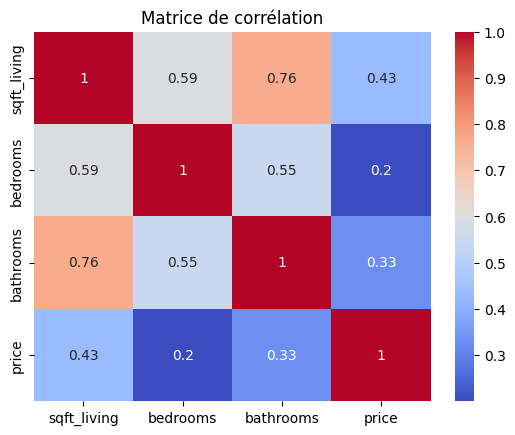

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrélation entre les variables
correlation_matrix = house_data[['sqft_living', 'bedrooms', 'bathrooms', 'price']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = house_data[['sqft_living', 'bedrooms', 'bathrooms']]
X_scaled = scaler.fit_transform(X)
y = house_data['price']


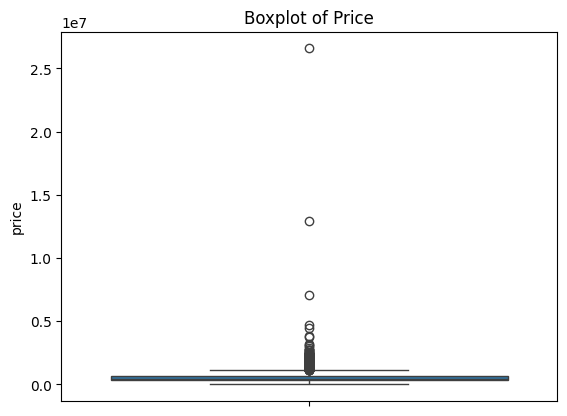

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for the 'price' column
sns.boxplot(y=house_data['price'])
plt.title("Boxplot of Price")
plt.show()

In [11]:
# Calculate the Interquartile Range (IQR) for the 'price' column
Q1 = house_data['price'].quantile(0.25, interpolation = 'midpoint')  # First quartile (25th percentile)
Q3 = house_data['price'].quantile(0.75, interpolation = 'midpoint')  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile Range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [12]:
# Filter out the outliers in the 'price' column
house_data = house_data[(house_data['price'] > lower_bound) & (house_data['price'] < upper_bound)]

In [13]:
# Display the filtered dataset
print("Filtered dataset without outliers:")
print(house_data.head())

Filtered dataset without outliers:
                  date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00  313000.0       3.0       1.50         1340      7912   
2  2014-05-02 00:00:00  342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00  420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00  550000.0       4.0       2.50         1940     10500   
5  2014-05-02 00:00:00  490000.0       2.0       1.00          880      6380   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   
5     1.0           0     0          3         880              0      1938   

   yr_ren

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
house_data[['sqft_living', 'bedrooms', 'bathrooms']] = scaler.fit_transform(house_data[['sqft_living', 'bedrooms', 'bathrooms']])

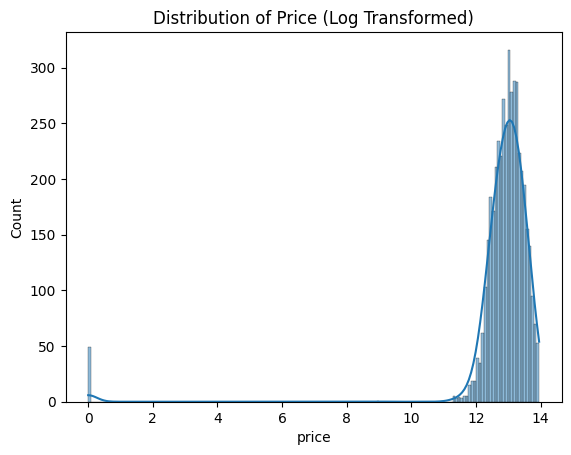

In [15]:

import numpy as np
house_data['price'] = np.log1p(house_data['price'])
# Visualize the new distribution
sns.histplot(house_data['price'], kde=True)
plt.title("Distribution of Price (Log Transformed)")
plt.show()



<Axes: >

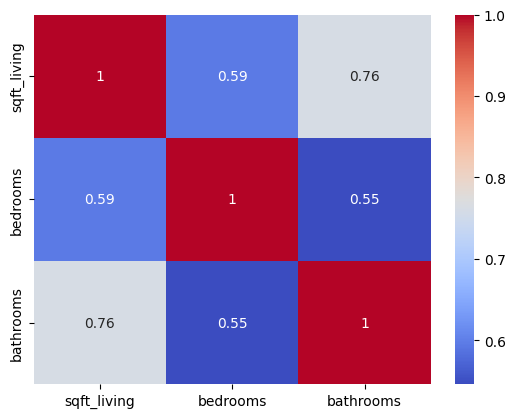

In [16]:
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')


In [35]:
# Define explanatory variables (features) and target variable
X = house_data[['sqft_living', 'bedrooms', 'bathrooms']]
y = house_data['price']

In [18]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
# Predictions
y_pred = model.predict(X_test)

In [28]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")


Mean Squared Error (MSE): 1.92
R-squared (R2): 0.01


In [29]:
# Example prediction for a new house
new_house = pd.DataFrame({
    'sqft_living': [2000],  # Example square footage
    'bedrooms': [3],        # Example number of bedrooms
    'bathrooms': [2]        # Example number of bathrooms
})
predicted_price_per_sqft = model.predict(new_house)
predicted_price = predicted_price_per_sqft[0] * new_house['sqft_living'][0]
print(f"Predicted Total Price: {predicted_price:.2f}")

Predicted Total Price: 648286.80


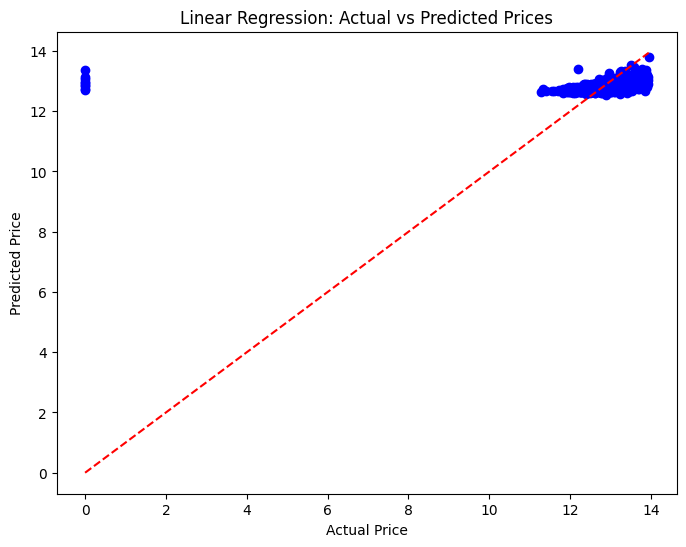

In [30]:
# Visualize the results: Actual prices vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression: Actual vs Predicted Prices')
plt.show()



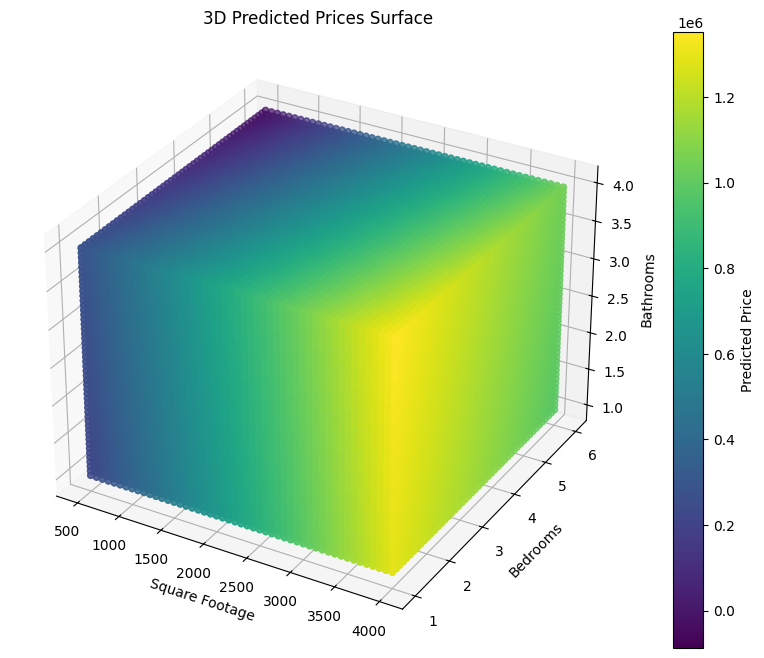

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data for visualization
sqft = np.linspace(500, 4000, 50)  # Square footage
bedrooms = np.linspace(1, 6, 50)  # Number of bedrooms
bathrooms = np.linspace(1, 4, 50)  # Number of bathrooms
X1, X2, X3 = np.meshgrid(sqft, bedrooms, bathrooms)  # Create a meshgrid for the three variables

# Predicted prices based on your model
predicted_prices = (304.61395285 * X1 - 61954.82503713 * X2 + 21000 * X3 + 111106.35554422351)  # Adding bathrooms

# 3D Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X1.flatten(), X2.flatten(), X3.flatten(), c=predicted_prices.flatten(), cmap='viridis', marker='o')

ax.set_xlabel("Square Footage")
ax.set_ylabel("Bedrooms")
ax.set_zlabel("Bathrooms")
ax.set_title("3D Predicted Prices Surface")
plt.colorbar(ax.scatter(X1.flatten(), X2.flatten(), X3.flatten(), c=predicted_prices.flatten(), cmap='viridis'), ax=ax, label="Predicted Price")
plt.show()
